In [607]:
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [608]:
df = pd.read_csv('pdb2019trv3_us.csv', encoding='latin-1')
df

,GIDTR,State,State_name,County,County_name,Tract,Flag,Num_BGs_in_Tract,LAND_AREA,AIAN_LAND,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacants_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
0,1001020100,1,Alabama,1,Autauga County,20100,NaN,2.0,3.788,0.0,...,100.00,NaN,68.25,1.92,0.00,16.39,81.69,61.84,6.40,NaN
1,1001020200,1,Alabama,1,Autauga County,20200,NaN,2.0,1.290,0.0,...,100.00,NaN,68.82,2.28,0.00,13.07,84.65,60.79,8.03,NaN
2,1001020300,1,Alabama,1,Autauga County,20300,NaN,2.0,2.065,0.0,...,100.00,NaN,72.95,1.67,0.00,6.53,91.79,72.95,0.00,NaN
3,1001020400,1,Alabama,1,Autauga County,20400,NaN,4.0,2.464,0.0,...,100.00,NaN,77.64,1.46,0.00,5.51,93.03,77.64,0.00,NaN
4,1001020500,1,Alabama,1,Autauga County,20500,NaN,3.0,4.401,0.0,...,100.00,NaN,70.97,2.16,0.00,5.96,91.87,70.97,0.00,NaN
5,1001020600,1,Alabama,1,Autauga County,20600,NaN,2.0,3.097,0.0,...,100.00,NaN,68.62,3.47,0.00,13.61,82.91,62.63,5.99,NaN
6,1001020700,1,Alabama,1,Autauga County,20700,NaN,2.0,8.652,0.0,...,100.00,NaN,67.87,3.40,0.00,14.99,81.61,61.67,6.20,NaN
7,1001020801,1,Alabama,1,Autauga County,20801,NaN,2.0,47.986,0.0,...,100.00,NaN,72.10,2.43,0.00,13.26,84.32,66.64,5.46,NaN
8,1001020802,1,Alabama,1,Autauga County,20802,NaN,4.0,73.673,0.0,...,100.00,NaN,72.15,2.76,0.00,12.76,84.49,65.57,6.58,NaN
9,1001020900,1,Alabama,1,Autauga County,20900,NaN,4.0,113.034,0.0,...,100.00,NaN,64.10,4.51,0.00,18.22,77.27,56.58,7.52,NaN


In [609]:
# https://api.census.gov/data/2018/pdb/tract/variables.html
#list(df.columns)
#df[['Males_CEN_2010','Males_ACS_13_17','Males_ACSMOE_13_17',]].plot(subplots=True, layout=(3, 1), figsize=(10, 20))

In [418]:
"""selected_columns = ['init_return',
                    'County_name',
                    'Neighborhood',
                    'URBANIZED_AREA_POP_CEN_2010',
                    'URBAN_CLUSTER_POP_CEN_2010',
                    'RURAL_POP_CEN_2010',
                    'Tot_Population_CEN_2010',
                    'Males_CEN_2010',
                    'Females_CEN_2010',
                    'Median_Age_ACS_13_17',
                    'Hispanic_CEN_2010',
                    'NH_White_alone_CEN_2010',
                    'NH_Blk_alone_CEN_2010',
                    'NH_AIAN_alone_CEN_2010',
                    'Not_HS_Grad_ACS_13_17',
                    'Born_US_ACS_13_17'
                   ]"""

selected_columns = ["pct_Census_Mail_Returns_CEN_2010"] + list(filter(lambda x: ('ACS_' in x) & ('pct' in x) , df.columns))

tdf = df[selected_columns]
tdf.columns = tdf.columns.map(lambda x: x.split('_ACS')[0])

In [505]:
list(tdf.columns)

['pct_Census_Mail_Returns_CEN_2010',
 'pct_Males',
 'pct_Females',
 'pct_Pop_under_5',
 'pct_Pop_5_17',
 'pct_Pop_18_24',
 'pct_Pop_25_44',
 'pct_Pop_45_64',
 'pct_Pop_65plus',
 'pct_Hispanic',
 'pct_NH_White_alone',
 'pct_NH_Blk_alone',
 'pct_NH_AIAN_alone',
 'pct_NH_Asian_alone',
 'pct_NH_NHOPI_alone',
 'pct_NH_SOR_alone',
 'pct_Pop_5yrs_Over',
 'pct_Othr_Lang',
 'pct_Age5p_Only_Eng',
 'pct_Age5p_Spanish',
 'pct_Age5p_French',
 'pct_Age5p_German',
 'pct_Age5p_Russian',
 'pct_Age5p_OthEuro',
 'pct_Age5p_Korean',
 'pct_Age5p_Chinese',
 'pct_Age5p_Vietnames',
 'pct_Age5p_Tagalog',
 'pct_Age5p_OthAsian',
 'pct_Age5p_Arabic',
 'pct_Age5p_OthUnSp',
 'pct_Pop_25yrs_Over',
 'pct_Not_HS_Grad',
 'pct_College',
 'pct_Pov_Univ',
 'pct_Prs_Blw_Pov_Lev',
 'pct_One_Health_Ins',
 'pct_TwoPHealthIns',
 'pct_No_Health_Ins',
 'pct_Civ_emp_16p',
 'pct_Civ_unemp_16p',
 'pct_Civ_emp_16_24',
 'pct_Civ_unemp_16_24',
 'pct_Civ_emp_25_44',
 'pct_Civ_unemp_25_44',
 'pct_Civ_emp_45_64',
 'pct_Civ_unemp_45_64',


In [420]:
assert(np.all(tdf.dtypes == np.float64))

In [421]:
np.sum(pd.isnull(tdf), axis=0).values / tdf.shape[0]

array([0.01541392, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00982114, 0.00982114, 0.00971307,
       0.0116854 , 0.00971307, 0.00971307, 0.00971307, 0.01125311,
       0.01125311, 0.0167108 , 0.0167108 , 0.01349562, 0.01349562,
       0.01398195, 0.01398195, 0.01117205, 0.00971307, 0.00971307,
       0.00971307, 0.00971307, 0.00971307, 0.00971307, 0.01530585,
       0.01356317, 0.01134767, 0.01529234, 0.03454285, 0.01214471,
       0.01214471, 0.01214471, 0.01214471, 0.01214471, 0.01214471,
       0.01214471, 0.01214471, 0.01214471, 0.01214471, 0.01214471,
       0.01214471, 0.01214471, 0.01214471, 0.01284718, 0.01214

In [422]:
old_size = tdf.shape[0]
tdf = tdf.dropna(axis=0)
1 - tdf.shape[0] / old_size

0.0556441154220253

In [610]:
X, y = tdf.iloc[:, 1:], tdf.iloc[:, 0]
X, X_test, y, y_test = train_test_split(X, y)

In [611]:
X.shape

(52428, 93)

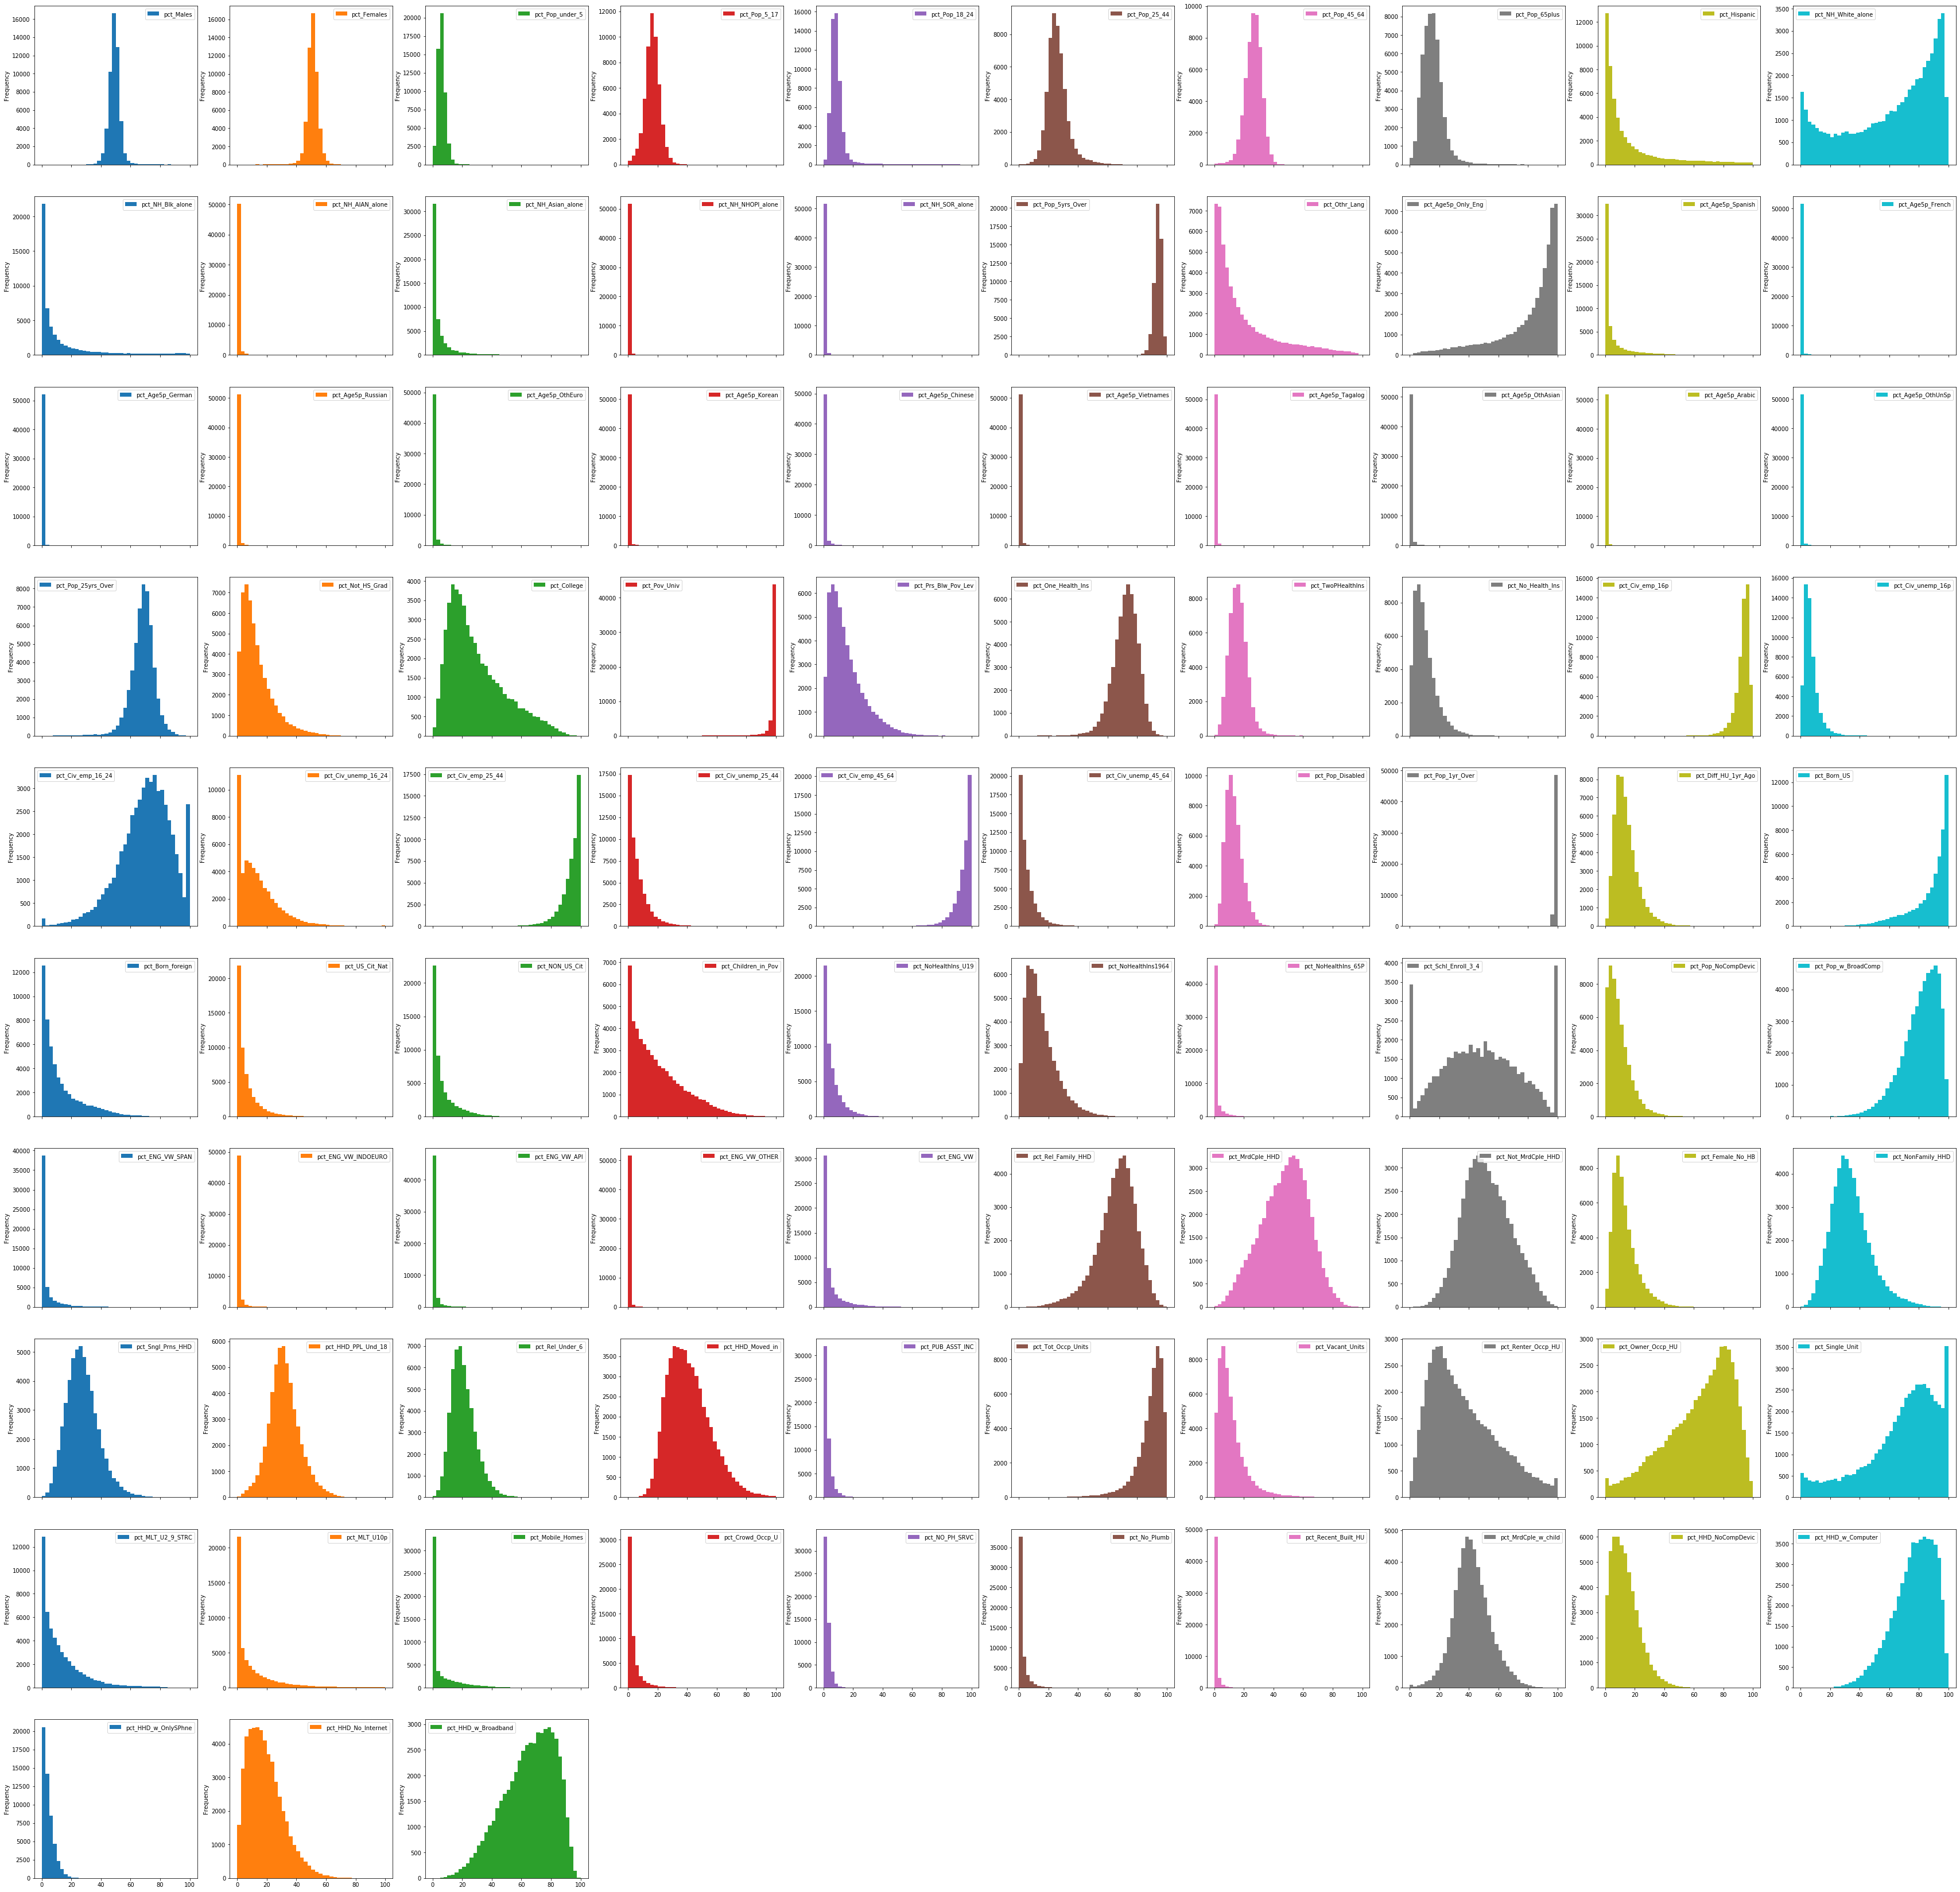

In [503]:
X.plot.hist(subplots=True, bins=40, layout=(10, 10), figsize=(60, 60))
print()

In [677]:
#float_columns = X.dtypes == np.float64
#apply_power_transform = X.var(axis=0) < 1

#pipe = make_pipeline(ColumnTransformer(
#                        [("standardscaler", StandardScaler(), ~apply_power_transform),
#                        ("powertransform", PowerTransformer(), apply_power_transform)],
#                    ),
#                     PCA(),
#                     Lasso())

pipe = make_pipeline(StandardScaler(),
                     PCA(),
                     Lasso())

pipe = make_pipeline(StandardScaler(), Lasso())

pipe.fit(X, y)
#pipe2.fit(X, y)
print()

array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,  5.55510204,  5.75714286,  5.95918367,
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ])

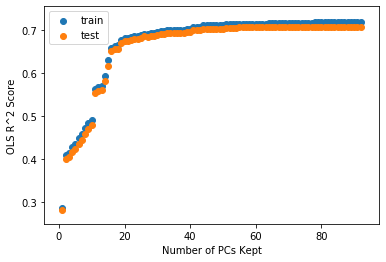

In [724]:
train_scores = []
test_scores = []
alphas = np.linspace(1, 96, num=10)
ns = np.arange(1, X.shape[1])

for n in ns:
    pipe = make_pipeline(StandardScaler(), PCA(n_components=n), LinearRegression())
    pipe.fit(X, y)
    train_scores.append(pipe.score(X, y))
    test_scores.append(pipe.score(X_test, y_test))
    
plt.scatter(ns, train_scores, label='train')
plt.scatter(ns, test_scores, label='test')
plt.xlabel("Number of PCs Kept")
plt.ylabel("OLS R^2 Score")
plt.legend()

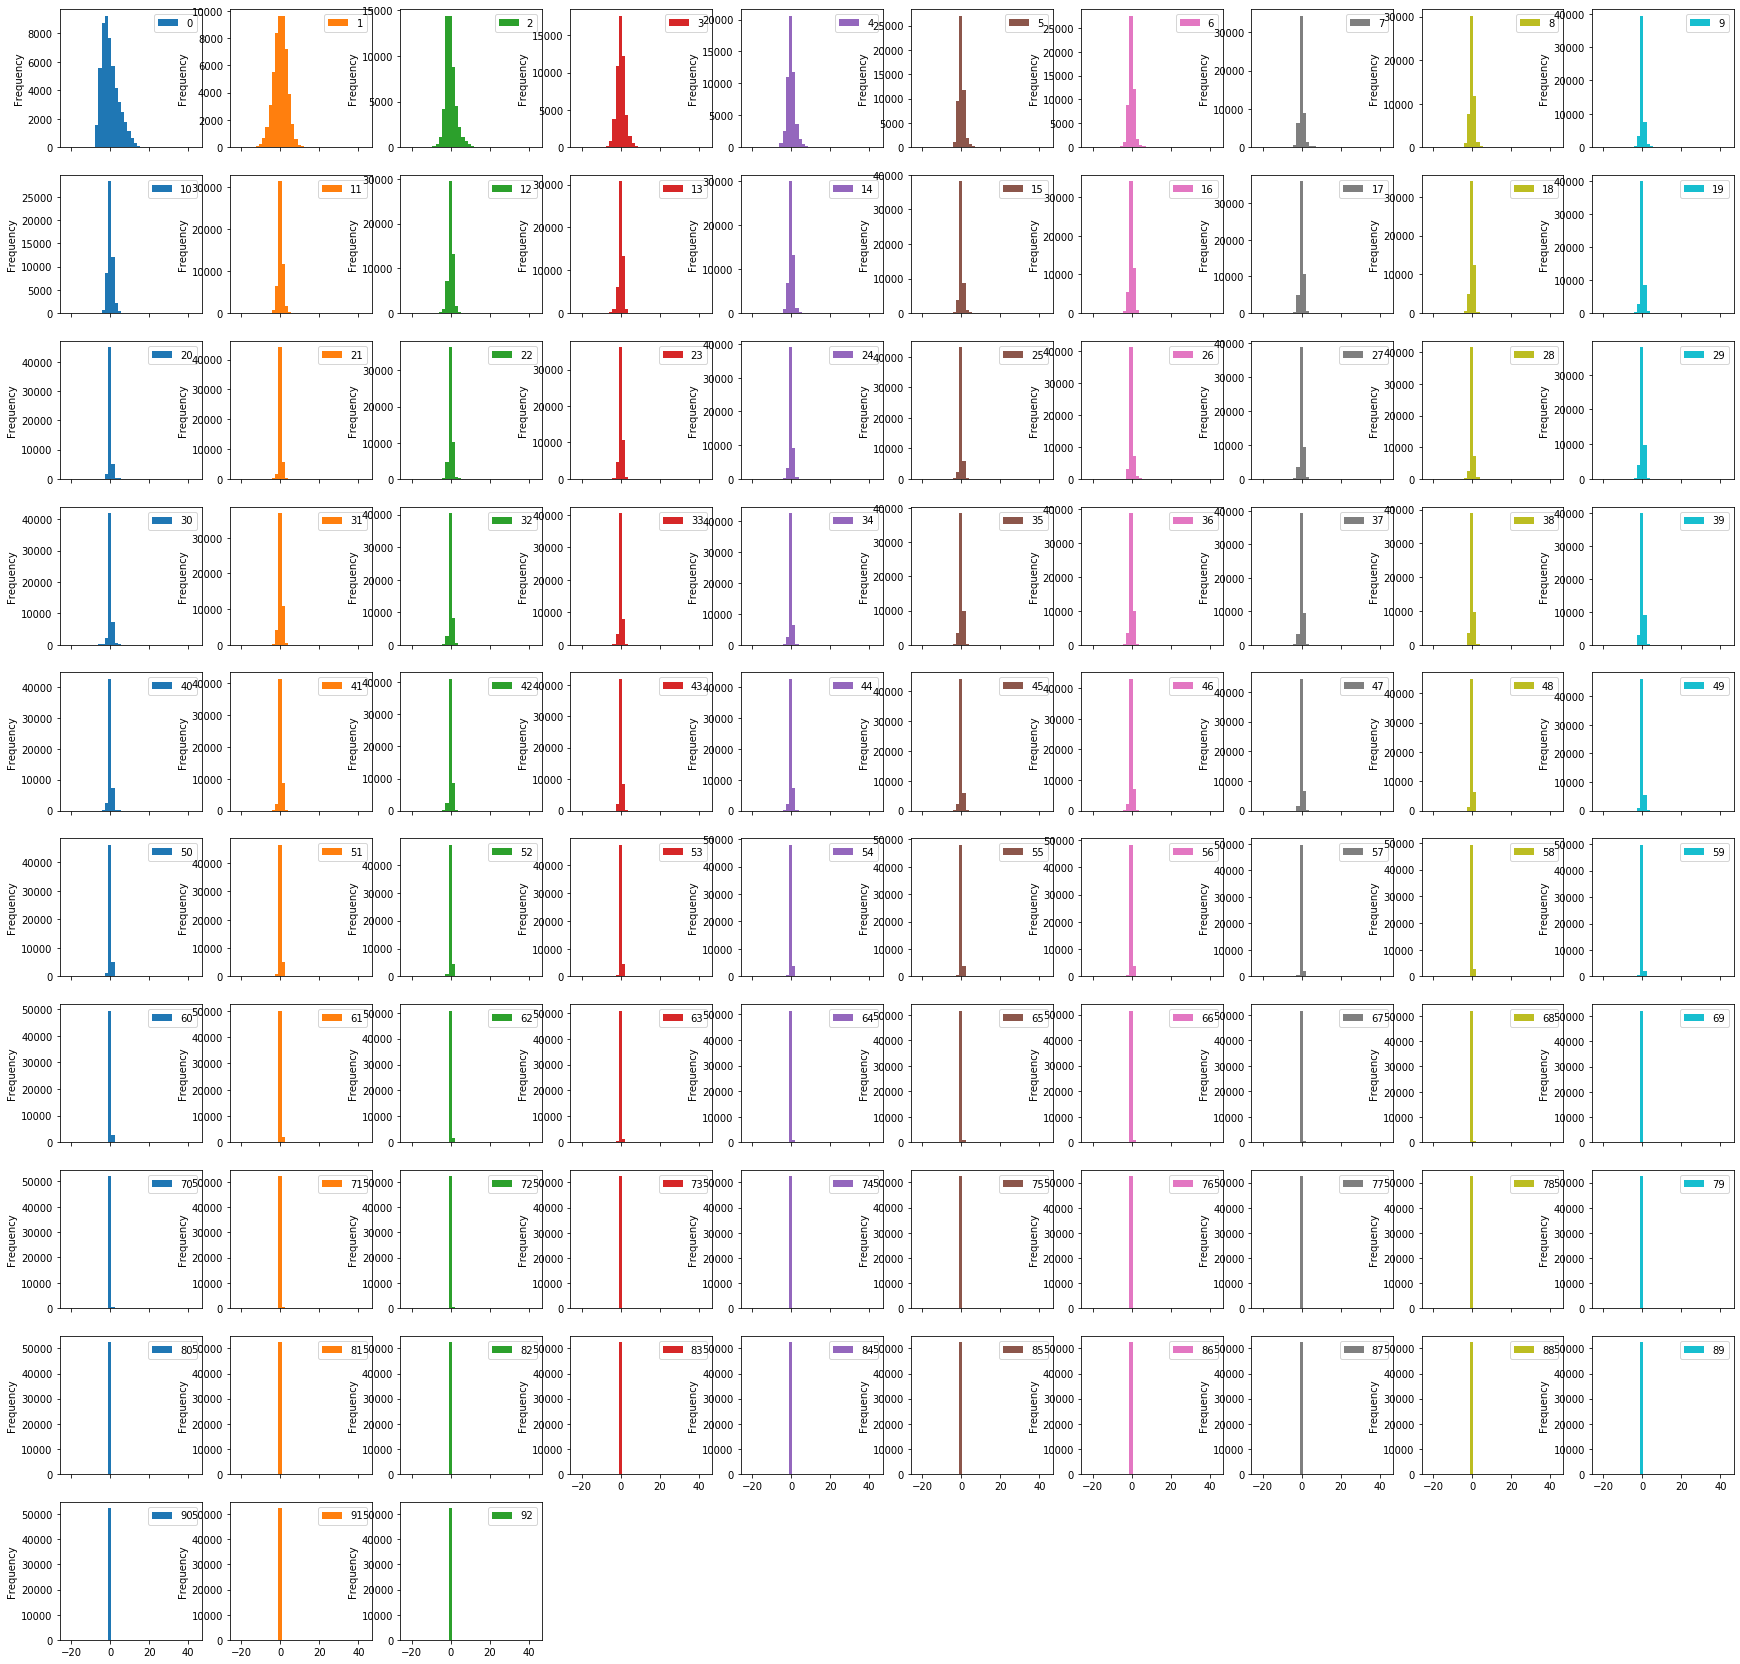

In [583]:
X_transformed = pd.DataFrame(pipe[:2].transform(X))
X_transformed.plot.hist(subplots=True, bins=40, layout=(10, 10), figsize=(30, 30))
print()

Text(0, 0.5, 'Cumulative Variance Captured')

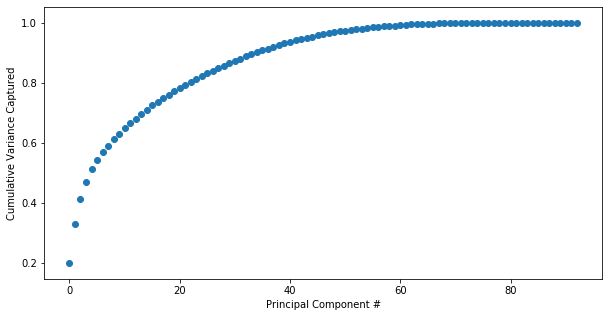

In [602]:
y = np.cumsum(pipe.named_steps.pca.explained_variance_ratio_)
x = np.arange(y.shape[0])
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.xlabel('Principal Component #')
plt.ylabel('Cumulative Variance Captured')


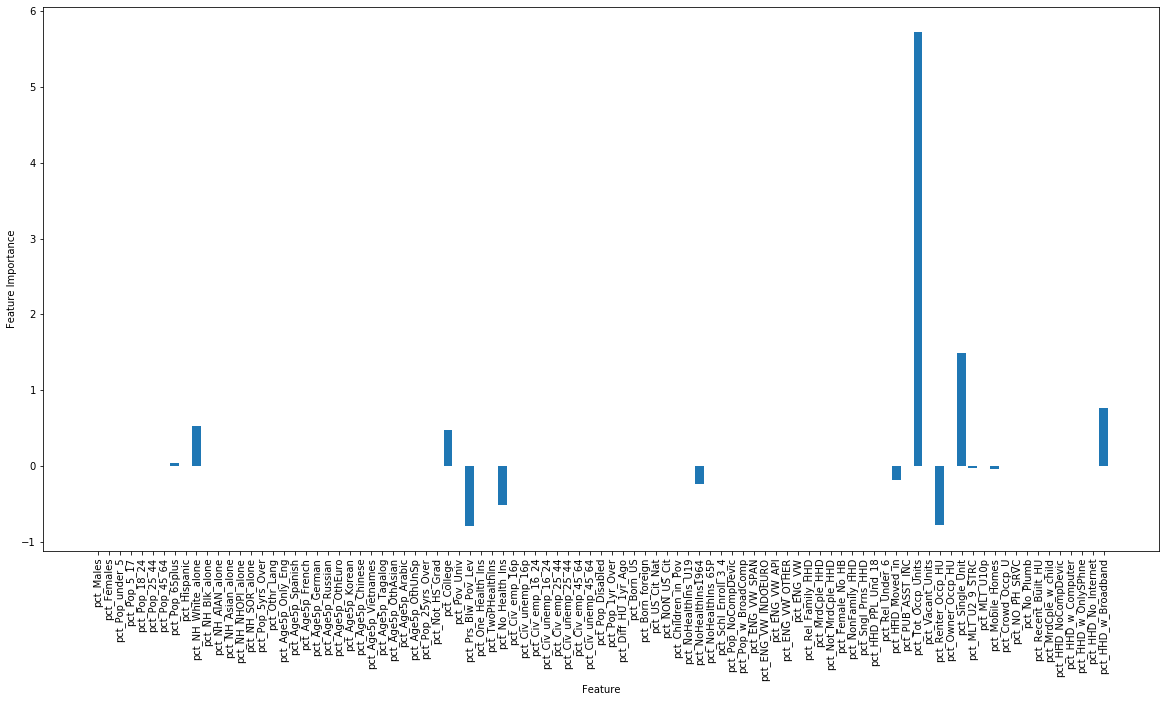

In [696]:
fig, ax = plt.subplots(figsize=(20,10))
coefs = pipe.steps[-1][1].coef_
nonzero_coefs = coefs[0 != coefs]
nonzero_coefs_idxs = np.where(0 != coefs)[0]
#names = X.columns

ax.bar(np.arange(coefs.shape[0]), coefs)
ax.set_xticks(np.arange(len(coefs)))
ax.set_xlabel("Feature")
ax.set_ylabel("Feature Importance")
ax.set_xticklabels(X.columns)
ax.xaxis.set_tick_params(rotation=90)
print()

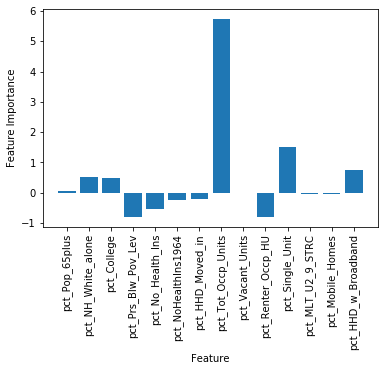

In [697]:
fig, ax = plt.subplots()
ax.bar(np.arange(nonzero_coefs.shape[0]), nonzero_coefs)
ax.set_xticks(np.arange(len(nonzero_coefs)))
ax.set_xlabel("Feature")
ax.set_ylabel("Feature Importance")
ax.set_xticklabels(nonzero_coefs_idxs)
ax.set_xticklabels(X.columns[nonzero_coefs_idxs])
ax.xaxis.set_tick_params(rotation=90)
print()

In [446]:
pipe.named_steps['pca'].components_.shape

(20, 93)

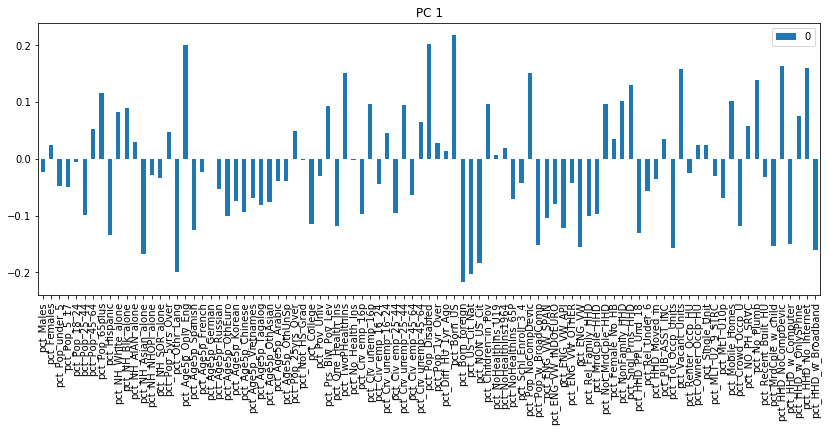

In [668]:
idx = 1
arr = pipe.named_steps['pca'].components_[idx, :]
#high_vak_mask = 0.1 < np.abs(arr)
#arr = arr[high_vak_mask]
df = pd.DataFrame(arr.T)

ax = df.plot(kind='bar', 
               figsize=(14, 5), 
               layout=(17, 1),
               )

ax.set_title(f"PC {idx}")
ax.set_xticklabels(X.columns) #[high_vak_mask])
    
print()

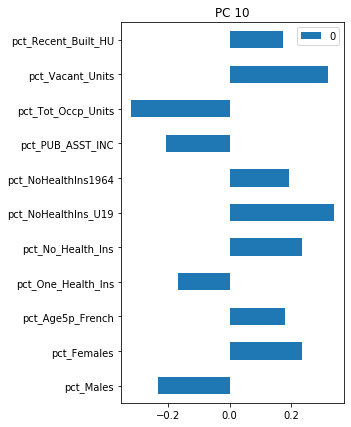

In [672]:
idx = 10

arr = pipe.named_steps['pca'].components_[idx, :]
#arr = arr[0, :]
high_val_mask = 0.15 < np.abs(arr)
arr = arr[high_val_mask]
df = pd.DataFrame(arr.T)

ax = df.plot.barh(
               figsize=(4, 7), 
               layout=(17, 1),
               #rot=75,
               )

ax.set_title(f"PC {idx}")
ax.set_yticklabels(X.columns[high_val_mask])
#plt.setp(ax.xaxis.get_majorticklabels(), ha='left')

print()

In [499]:
components = pipe.named_steps['pca'].components_[nonzero_coefs_idxs, :].T

for i in range(components.shape[1]):
    print(list(X.columns[ (0.2 < np.abs(components)[:, i])]))
    #print(X.columns[np.argsort(np.abs(components)[:, i])])

[]
['pct_Pop_Disabled', 'pct_Born_US', 'pct_Born_foreign', 'pct_US_Cit_Nat']
['pct_Pop_5_17', 'pct_Rel_Family_HHD', 'pct_NonFamily_HHD', 'pct_Sngl_Prns_HHD', 'pct_HHD_PPL_Und_18', 'pct_Single_Unit', 'pct_MLT_U10p']
['pct_Pop_under_5', 'pct_Pop_65plus', 'pct_Pop_5yrs_Over', 'pct_Pop_25yrs_Over', 'pct_Rel_Under_6']
['pct_Males', 'pct_Females', 'pct_Civ_emp_16p', 'pct_Civ_unemp_16p', 'pct_Civ_emp_25_44', 'pct_Civ_unemp_25_44']
['pct_Males', 'pct_Females', 'pct_Pop_under_5', 'pct_Pop_18_24', 'pct_Pop_5yrs_Over', 'pct_Pov_Univ']
['pct_Hispanic', 'pct_NH_Asian_alone', 'pct_Age5p_Spanish', 'pct_Age5p_Chinese', 'pct_Age5p_OthAsian', 'pct_ENG_VW_SPAN', 'pct_ENG_VW_API']
['pct_Males', 'pct_Females', 'pct_Age5p_Russian', 'pct_Age5p_OthEuro', 'pct_Age5p_Arabic', 'pct_Age5p_OthUnSp', 'pct_ENG_VW_INDOEURO', 'pct_ENG_VW_API', 'pct_ENG_VW_OTHER']
['pct_Males', 'pct_Females', 'pct_Pop_18_24', 'pct_Pop_25_44', 'pct_Pop_25yrs_Over', 'pct_Pov_Univ', 'pct_Civ_emp_45_64', 'pct_Civ_unemp_45_64']
['pct_Males'

In [489]:
np.argsort(np.abs(components), axis=0)

array([[82, 20, 25, ..., 87, 11, 52],
       [21, 31, 13, ..., 13,  8, 89],
       [23, 37, 76, ..., 90, 21,  8],
       ...,
       [77, 51, 70, ..., 54, 26, 82],
       [31, 50, 69, ..., 75, 27, 57],
       [34, 49, 65, ..., 76, 13, 20]])

In [511]:
tdf[['pct_Born_US', 'pct_Born_foreign']].corr()

,pct_Born_US,pct_Born_foreign
pct_Born_US,1.0,-1.0
pct_Born_foreign,-1.0,1.0


In [510]:
tdf.corr()

,pct_Census_Mail_Returns_CEN_2010,pct_Males,pct_Females,pct_Pop_under_5,pct_Pop_5_17,pct_Pop_18_24,pct_Pop_25_44,pct_Pop_45_64,pct_Pop_65plus,pct_Hispanic,...,pct_Crowd_Occp_U,pct_NO_PH_SRVC,pct_No_Plumb,pct_Recent_Built_HU,pct_MrdCple_w_child,pct_HHD_NoCompDevic,pct_HHD_w_Computer,pct_HHD_w_OnlySPhne,pct_HHD_No_Internet,pct_HHD_w_Broadband
pct_Census_Mail_Returns_CEN_2010,1.000000,-0.068364,0.068364,-0.128062,0.067066,-0.146140,-0.101745,0.225634,0.059291,-0.135881,...,-0.215090,-0.255718,-0.428438,0.028143,0.059813,-0.440572,0.512872,-0.416212,-0.496632,0.524573
pct_Males,-0.068364,1.000000,-1.000000,-0.076492,-0.072318,0.031413,0.162297,0.041120,-0.149407,0.085321,...,0.077019,0.024006,0.034234,0.050192,0.042312,-0.050147,0.048293,-0.016741,-0.034992,-0.032374
pct_Females,0.068364,-1.000000,1.000000,0.076492,0.072318,-0.031413,-0.162297,-0.041120,0.149407,-0.085321,...,-0.077019,-0.024006,-0.034234,-0.050192,-0.042313,0.050147,-0.048293,0.016741,0.034992,0.032374
pct_Pop_under_5,-0.128062,-0.076492,0.076492,1.000000,0.290609,-0.051082,0.237454,-0.421773,-0.427527,0.271439,...,0.320883,0.100441,0.044130,0.042376,0.461328,0.136490,-0.251135,0.293629,0.184984,-0.169531
pct_Pop_5_17,0.067066,-0.072318,0.072318,0.290609,1.000000,-0.212971,-0.153048,-0.107451,-0.373381,0.237793,...,0.235688,-0.030429,0.048031,0.042921,0.554330,0.052981,-0.138751,0.183657,0.092342,-0.113076
pct_Pop_18_24,-0.146140,0.031413,-0.031413,-0.051082,-0.212971,1.000000,-0.039810,-0.497548,-0.333603,0.102668,...,0.110831,0.113517,0.000429,-0.014152,0.067460,0.016848,-0.062206,0.095796,0.040560,-0.059340
pct_Pop_25_44,-0.101745,0.162297,-0.162297,0.237454,-0.153048,-0.039810,1.000000,-0.489464,-0.567436,0.241848,...,0.230643,0.096817,-0.108866,0.109296,0.274459,-0.136140,0.049459,0.076076,-0.096109,0.120899
pct_Pop_45_64,0.225634,0.041120,-0.041120,-0.421773,-0.107451,-0.497548,-0.489464,1.000000,0.394473,-0.344881,...,-0.360907,-0.169430,0.032136,-0.069609,-0.374832,-0.104214,0.212110,-0.255011,-0.149878,0.130380
pct_Pop_65plus,0.059291,-0.149407,0.149407,-0.427527,-0.373381,-0.333603,-0.567436,0.394473,1.000000,-0.334610,...,-0.334584,-0.084736,0.034538,-0.088194,-0.605434,0.119699,0.027803,-0.200871,0.047405,-0.030127
pct_Hispanic,-0.135881,0.085321,-0.085321,0.271439,0.237793,0.102668,0.241848,-0.344881,-0.334610,1.000000,...,0.659698,0.089685,-0.078429,-0.027476,0.436145,0.114253,-0.232481,0.294166,0.169265,-0.152393


In [686]:
pipe.score(X_test, y_test), 

(0.6529445076816374,)

Text(0.5, 1.0, 'Test Set Score')

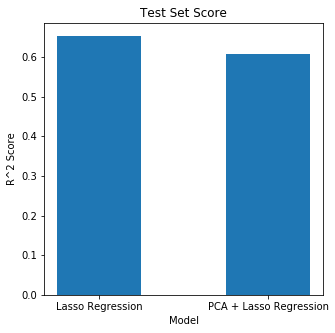

In [691]:
fix, ax = plt.subplots(figsize=(5,5))

ax.bar([0, 0.4], [0.6529, 0.60709], width=0.2, tick_label=('Lasso Regression', 'PCA + Lasso Regression'))
#ax.set_ylim(0, 1)
ax.set_ylabel('R^2 Score')
ax.set_xlabel('Model')
ax.set_title('Test Set Score')
